In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve,roc_auc_score,auc

In [3]:
wine=pd.read_csv('winequality-red.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.shape

(1599, 12)

In [6]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


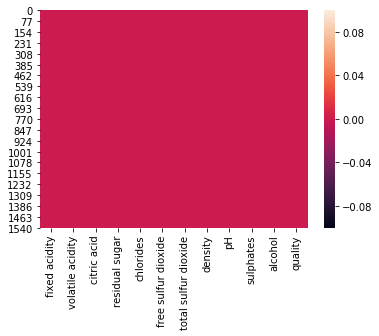

In [8]:
#To check missing value
sns.heatmap(wine.isnull())

In [9]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#To check duplicate values
wine.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [11]:
wine.duplicated().sum()

240

In [12]:
#Removing Duplicates
wine.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Summary Statistics

In [13]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Check Correlation

In [14]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


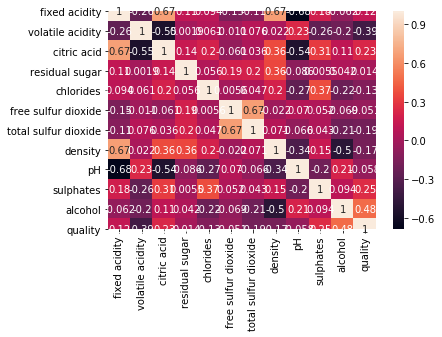

In [15]:
sns.heatmap(wine.corr(),annot=True)

Ploting Outliers

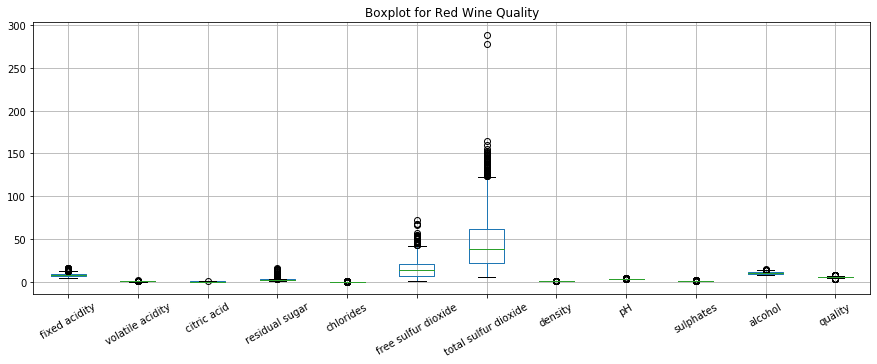

In [16]:
wine.plot(kind='box',grid=True,title="Boxplot for Red Wine Quality",legend=True,rot=30,figsize=(15,5))

In [17]:
#check for Outlier
from scipy.stats import zscore
z_score=abs(zscore(wine))
wine= wine.loc[(z_score < 3).all(axis=1)]

Check for Skewness

In [18]:
wine.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [19]:
for col in wine.columns:
    if wine.skew().loc[col] > 0.55:
        wine[col]=np.log1p(wine[col])

In [20]:
wine.skew()

fixed acidity           0.427066
volatile acidity        0.380659
citric acid             0.291297
residual sugar          1.541853
chlorides               2.074343
free sulfur dioxide    -0.167401
total sulfur dioxide   -0.052860
density                 0.055738
pH                      0.114705
sulphates               0.667517
alcohol                 0.606101
quality                 0.407865
dtype: float64

Exploring Data Variables

In [21]:
#Quality
wine.quality.unique()

array([5, 6, 7, 4, 8], dtype=int64)

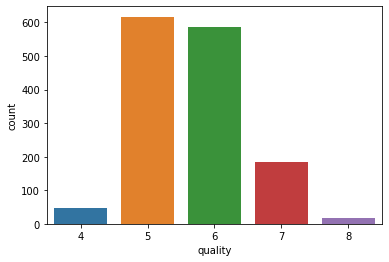

In [22]:
sns.countplot(x='quality',data=wine)

In [23]:
wine['quality'].value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

Bivariate Analysis

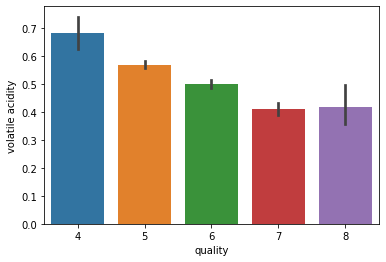

In [24]:
sns.barplot(x='quality',y='volatile acidity',data=wine)

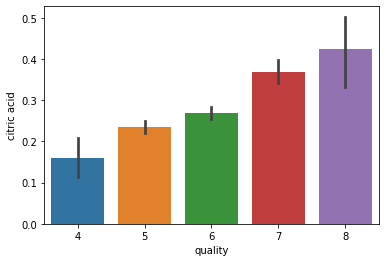

In [25]:
sns.barplot(x='quality',y='citric acid',data=wine)

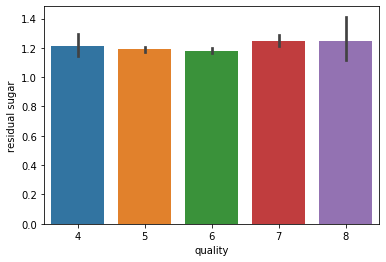

In [26]:
sns.barplot(x='quality',y='residual sugar',data=wine)

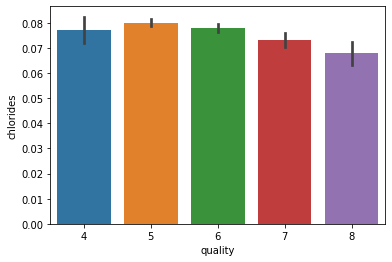

In [27]:
sns.barplot(x='quality',y='chlorides',data=wine)

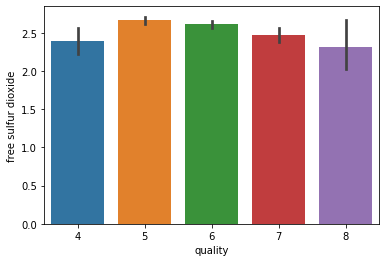

In [28]:
sns.barplot(x='quality',y='free sulfur dioxide',data=wine)

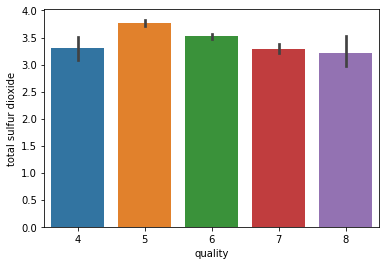

In [29]:
sns.barplot(x='quality',y='total sulfur dioxide',data=wine)

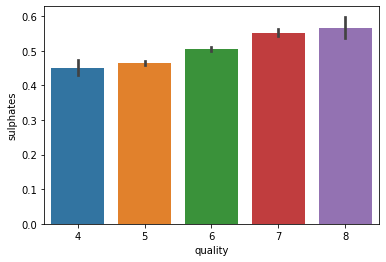

In [30]:
sns.barplot(x='quality',y='sulphates',data=wine)

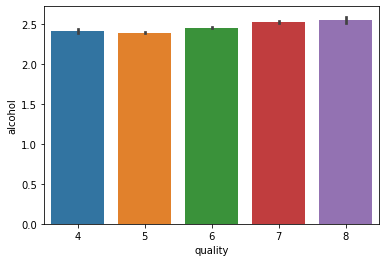

In [31]:
sns.barplot(x='quality',y='alcohol',data=wine)

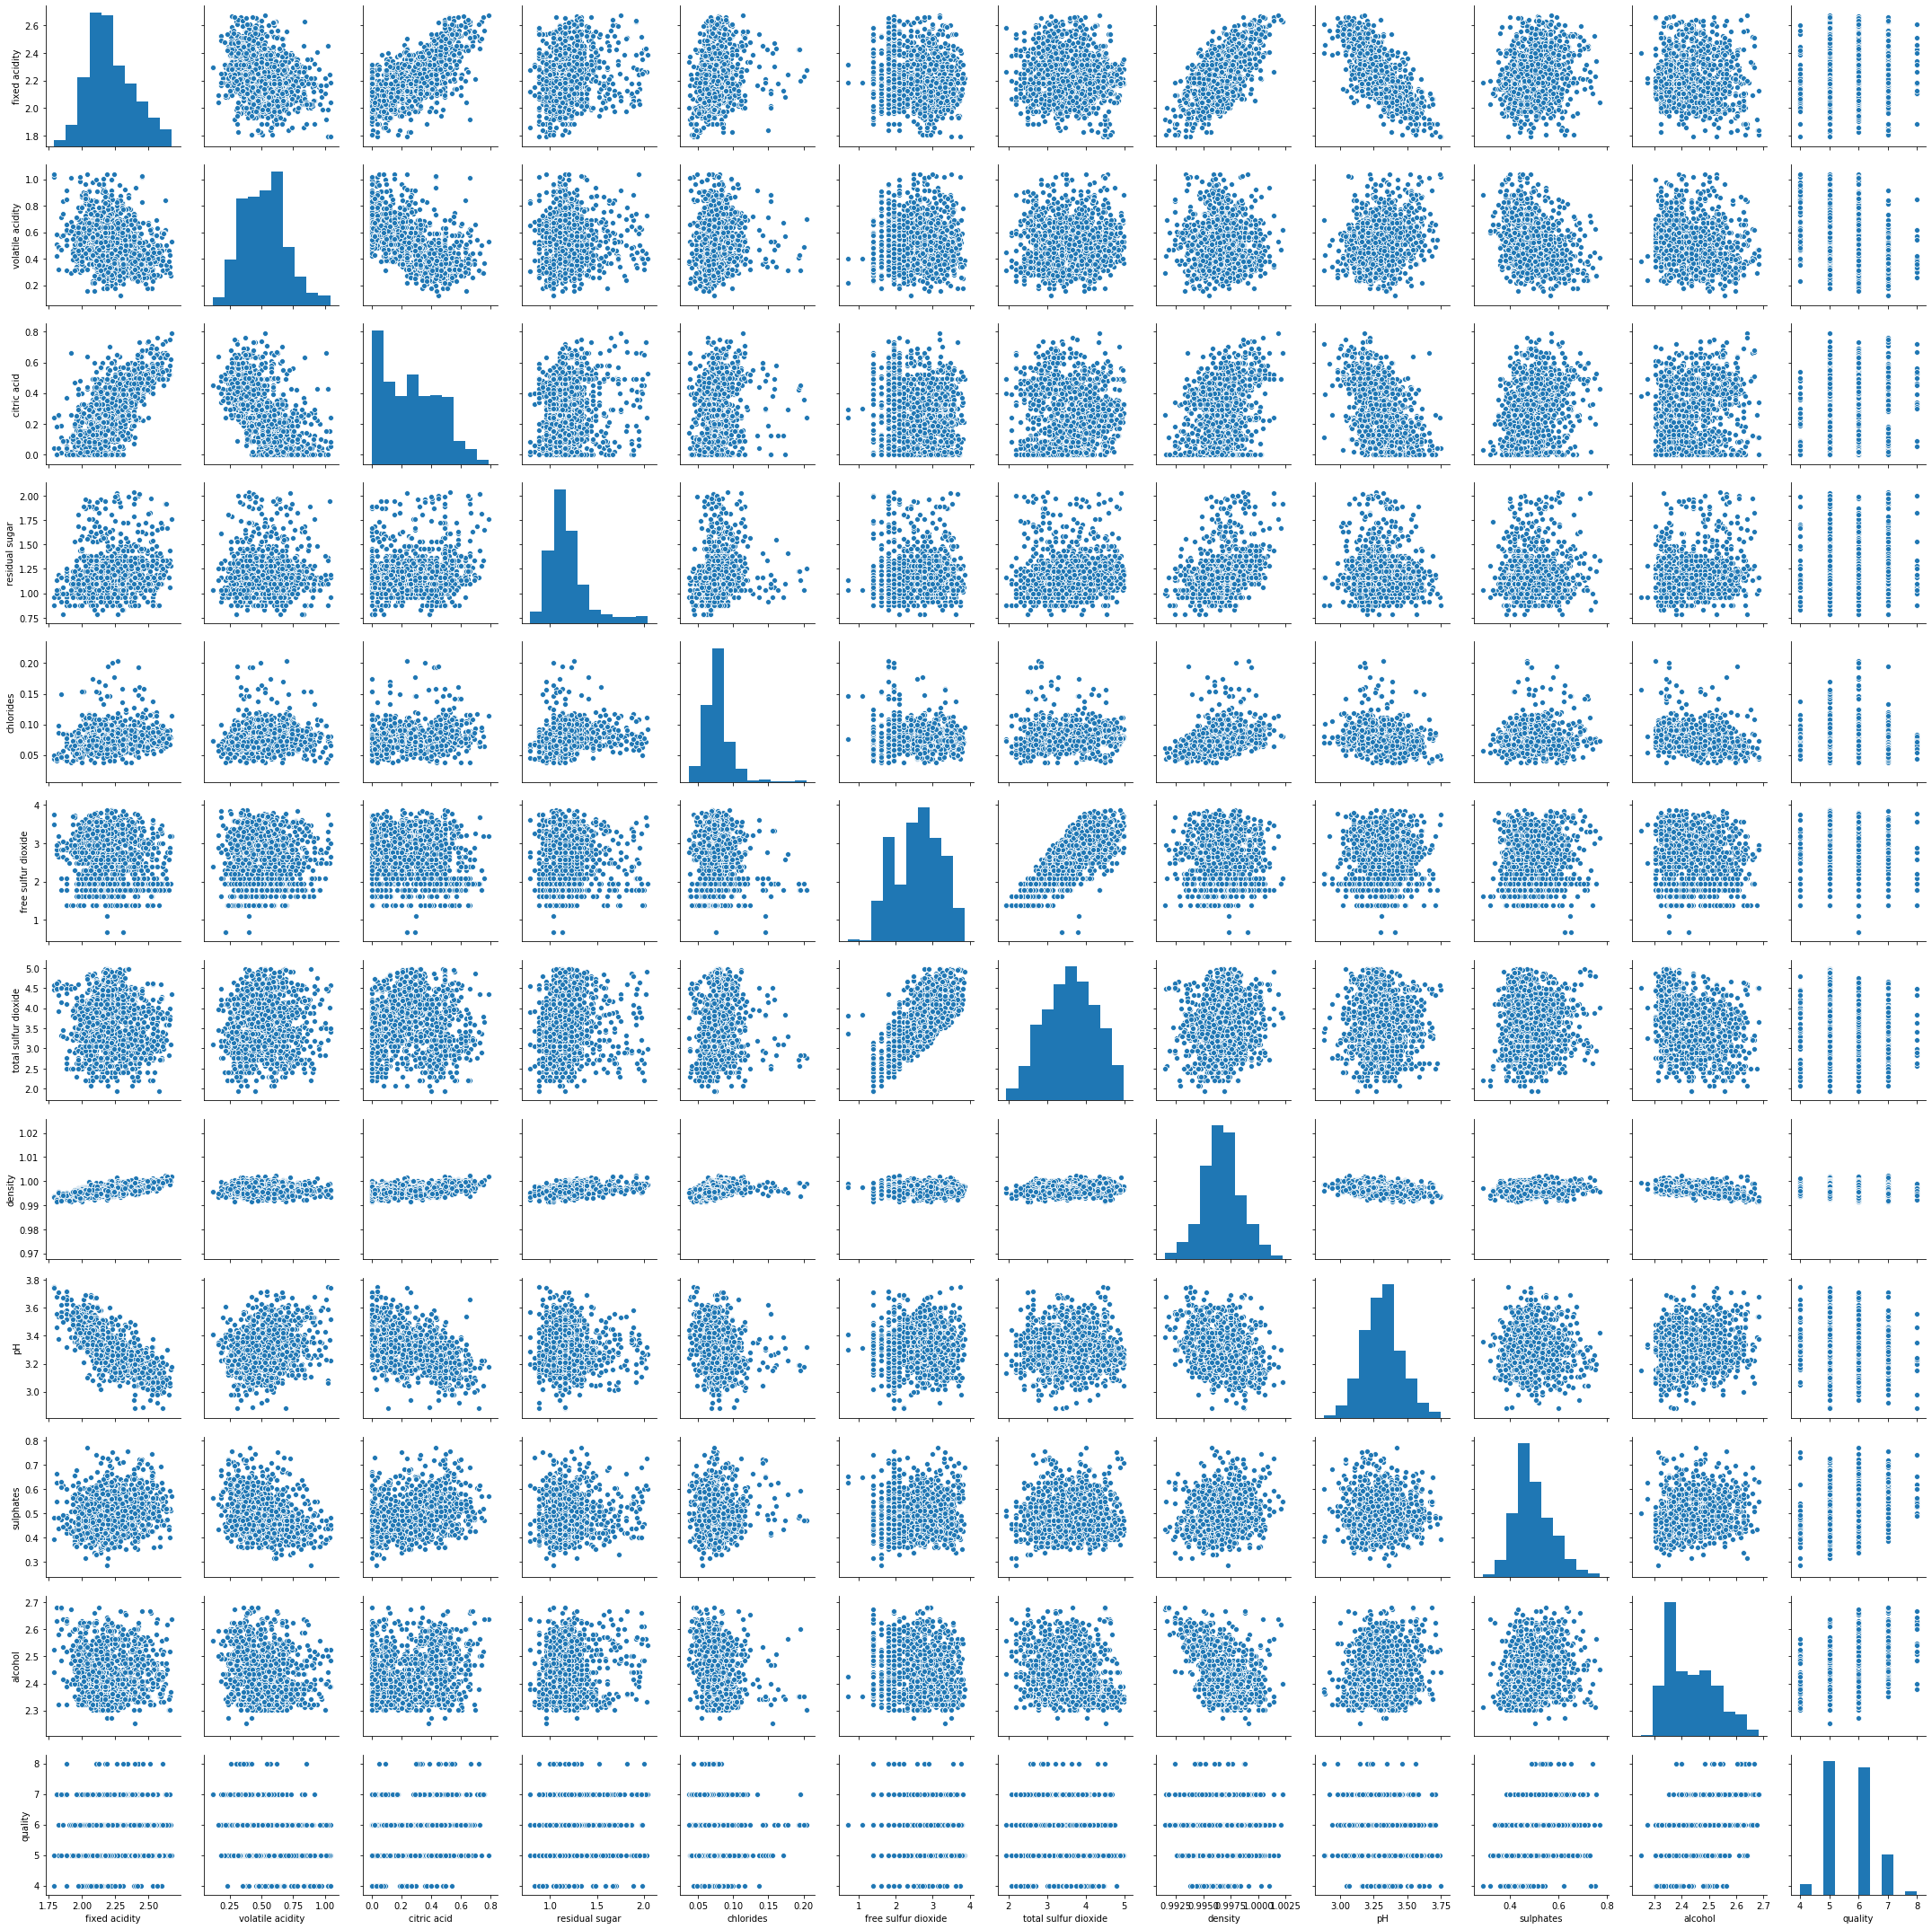

In [32]:
sns.pairplot(wine)

In [33]:
bins=(2,6,8)
grp_name=['Bad','Good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=grp_name)

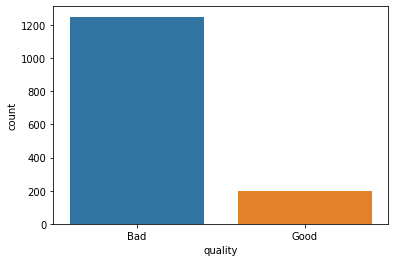

In [34]:
sns.countplot(x='quality',data=wine)

Label Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
labelquality = LabelEncoder()

In [36]:
wine['quality'] = labelquality.fit_transform(wine['quality'])

In [37]:
wine['quality'].value_counts()

0    1250
1     201
Name: quality, dtype: int64

Features and Target Value

In [38]:
x=wine.drop('quality',axis=1)
y=wine['quality']

In [39]:
x.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.128232,0.70,0.0,1.064711,0.07325,2.484907,3.555348,0.9978,3.51,0.444686,2.341806
1,2.174752,0.88,0.0,1.280934,0.09349,3.258097,4.219508,0.9968,3.20,0.518794,2.379546


In [40]:
y.head(2)

0    0
1    0
Name: quality, dtype: int32

Standardisation 

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [42]:
x=sc.fit_transform(x)
x

array([[-0.5184909 ,  1.05091371, -1.39039974, ...,  1.37589608,
        -0.63180338, -1.03117724],
       [-0.24468533,  2.11933582, -1.39039974, ..., -0.8219512 ,
         0.33203817, -0.59779681],
       [-0.24468533,  1.40705441, -1.18083057, ..., -0.3965614 ,
         0.09769113, -0.59779681],
       ...,
       [-1.34460041, -0.07686519, -0.70929993, ...,  0.73781138,
         0.86296533,  0.612081  ],
       [-1.67628019,  0.72445139, -0.76169222, ...,  1.80128587,
         0.56223727, -0.18017921],
       [-1.59159155, -1.26400088,  1.07203802, ...,  0.52511649,
         0.17627692,  0.612081  ]])

Spilt Train and Test

In [43]:
#create best random_state
def rst(mod,x,y):
    max_r=0
    for rn_state in range (25,150):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=rn_state)
        mod.fit(x_train,y_train)
        pred=mod.predict(x_test)
        acs=accuracy_score(pred,y_test)
        f1=f1_score(y_test,pred)
        cnf=confusion_matrix(y_test,pred)
        clr=classification_report(y_test,pred)
        
        if acs > max_r:
            max_r=acs
            random_state=rn_state
    print("random_state for mod"," is ",random_state,"which gives accuracy score of: ",max_r)
    print('f1_score: ', f1)
    print('confusion matrix: ',cnf)
    print('classification report: ',clr)
    return random_state     

Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs")
lr_g=rst(lr,x,y)

random_state for mod  is  67 which gives accuracy score of:  0.9288990825688074
f1_score:  0.46511627906976744
confusion matrix:  [[370  17]
 [ 29  20]]
classification report:                precision    recall  f1-score   support

           0       0.93      0.96      0.94       387
           1       0.54      0.41      0.47        49

    accuracy                           0.89       436
   macro avg       0.73      0.68      0.70       436
weighted avg       0.88      0.89      0.89       436



In [45]:
#Cross Validation
accuracy_score_1=cross_val_score(lr,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_1

0.8794000944733114

KNN

In [46]:
kn=KNeighborsClassifier()
kn_param={'n_neighbors':range(1,10),'leaf_size':range(20,70)}
kn_g=GridSearchCV(kn,kn_param,cv=15)
kn_g.fit(x,y)
kn_g.best_params_

{'leaf_size': 20, 'n_neighbors': 4}

In [47]:
kn=KNeighborsClassifier(n_neighbors=5)
knn=rst(kn,x,y)

random_state for mod  is  67 which gives accuracy score of:  0.9128440366972477
f1_score:  0.48936170212765956
confusion matrix:  [[365  22]
 [ 26  23]]
classification report:                precision    recall  f1-score   support

           0       0.93      0.94      0.94       387
           1       0.51      0.47      0.49        49

    accuracy                           0.89       436
   macro avg       0.72      0.71      0.71       436
weighted avg       0.89      0.89      0.89       436



In [48]:
#Cross Validation
accuracy_score_2=cross_val_score(kn,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_2

0.8635333018422294

DecisionTree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_param={'criterion':['gini','entropy'],'max_depth':range(3,10)}
dt_g=GridSearchCV(dt,dt_param,cv=15)
dt_g.fit(x,y)
dt_g.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [50]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc=rst(dt,x,y)

random_state for mod  is  91 which gives accuracy score of:  0.9197247706422018
f1_score:  0.42696629213483145
confusion matrix:  [[366  21]
 [ 30  19]]
classification report:                precision    recall  f1-score   support

           0       0.92      0.95      0.93       387
           1       0.47      0.39      0.43        49

    accuracy                           0.88       436
   macro avg       0.70      0.67      0.68       436
weighted avg       0.87      0.88      0.88       436



In [51]:
#Cross Validation
accuracy_score_3=cross_val_score(dt,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_3

0.8614548889938594

GaussianNB

In [52]:
nb=GaussianNB()
gnb=rst(nb,x,y)

random_state for mod  is  54 which gives accuracy score of:  0.8967889908256881
f1_score:  0.5
confusion matrix:  [[337  50]
 [ 16  33]]
classification report:                precision    recall  f1-score   support

           0       0.95      0.87      0.91       387
           1       0.40      0.67      0.50        49

    accuracy                           0.85       436
   macro avg       0.68      0.77      0.71       436
weighted avg       0.89      0.85      0.86       436



In [53]:
#Cross Validation
accuracy_score_4=cross_val_score(nb,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_4

0.8490410958904111

SVC

In [54]:
sv=SVC()
sv_param={'kernel':('rbf','linear','poly'),'degree':range(3,8)}
sv_g=GridSearchCV(sv,sv_param,cv=15)
sv_g.fit(x,y)
sv_g.best_params_

{'degree': 3, 'kernel': 'rbf'}

In [55]:
sv=SVC(kernel='rbf',degree=3)
svc=rst(sv,x,y)

random_state for mod  is  70 which gives accuracy score of:  0.9288990825688074
f1_score:  0.45333333333333325
confusion matrix:  [[378   9]
 [ 32  17]]
classification report:                precision    recall  f1-score   support

           0       0.92      0.98      0.95       387
           1       0.65      0.35      0.45        49

    accuracy                           0.91       436
   macro avg       0.79      0.66      0.70       436
weighted avg       0.89      0.91      0.89       436



In [56]:
#Cross Validation
accuracy_score_5=cross_val_score(sv,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_5

0.8828436466698157

Gradient Boosting

In [57]:
gb=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=85)

gb_param= {"learning_rate": [0.0001,0.025,0.1,1.0], "n_estimators":[250,500,750,1000]}

gb_g= GridSearchCV(gb,gb_param,cv=15)
gb_g.fit(x_train,y_train)
print("best parameters:", gb_g.best_params_)
print("\n best score:",gb_g.best_score_)

best parameters: {'learning_rate': 0.025, 'n_estimators': 500}

 best score: 0.9064039408866995


In [58]:
gb=GradientBoostingClassifier(learning_rate=0.025, n_estimators= 250)
gbc=rst(gb,x,y)

random_state for mod  is  70 which gives accuracy score of:  0.9357798165137615
f1_score:  0.5
confusion matrix:  [[373  14]
 [ 28  21]]
classification report:                precision    recall  f1-score   support

           0       0.93      0.96      0.95       387
           1       0.60      0.43      0.50        49

    accuracy                           0.90       436
   macro avg       0.77      0.70      0.72       436
weighted avg       0.89      0.90      0.90       436



In [59]:
#Cross Validation
accuracy_score_6=cross_val_score(gb,x,y,scoring='accuracy',cv=10).mean()
accuracy_score_6

0.882144544166273

Final Model

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=133)
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
acs=accuracy_score(pred,y_test)
f1=f1_score(y_test,pred)
cnf=confusion_matrix(y_test,pred)
clr=classification_report(y_test,pred)
print('accuracy score: ', acs)
print('f1_score:', f1)
print('confusion matrix:\n',cnf)
print('classification report:\n', clr)

accuracy score:  0.9174311926605505
f1_score: 0.5384615384615384
confusion matrix:
 [[379   4]
 [ 32  21]]
classification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       383
           1       0.84      0.40      0.54        53

    accuracy                           0.92       436
   macro avg       0.88      0.69      0.75       436
weighted avg       0.91      0.92      0.90       436



In [61]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [62]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.01044386 1.        ]
[0.         0.39622642 1.        ]
[2 1 0]


In [63]:
scoring=roc_auc_score(y_test,pred)
scoring

0.6928912754322873

In [64]:
roc_auc=auc(fpr,tpr)
roc_auc

0.6928912754322873

ROC Curve

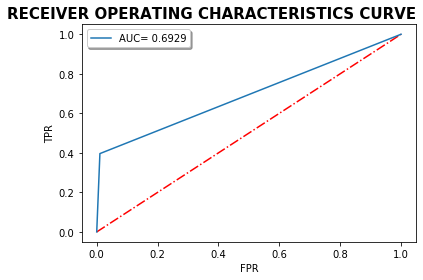

In [65]:
plt.plot([0,1],[0,1],color='red',linestyle="dashdot")
plt.plot(fpr,tpr,label="AUC= %0.4f" % roc_auc)
plt.legend(loc='best',fontsize='medium',shadow=True)
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE',size=15,weight='bold',loc='right')
plt.show()

In [66]:
import joblib
joblib.dump(dt,"DecisionTree_SBI_InsuranceClaim.pkl")

['DecisionTree_SBI_InsuranceClaim.pkl']